In [2]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import importlib

In [3]:
import functions as functions
import farm as farm

In [18]:
importlib.reload(farm)

<module 'farm' from '/Users/djdebonis/repos/cafelytics/farm.py'>

In [8]:
def readData(filePath):
    pathExt = filePath.split('.')
    ext = pathExt[1]
    
    if ext == 'csv':
        data = pd.read_csv(filePath)
        
    return(data)

In [19]:
df = readData('demoData.csv')
df.head()

,Unnamed: 0,farmerName,treeType,numCuerdas,ageOfTrees
0,0,Estefanía Cazares,catuai,9,9
1,1,Aldo Linares,catuai,1,2
2,2,Aldo Linares,borbon,1,20
3,3,Linda Gabriel Portillo Herrera,catuai,4,7
4,4,Linda Gabriel Portillo Herrera,borbon,10,27


In [22]:
for i in range(len(df)):
    print(df['farmerName'][i])

Estefanía Cazares
Aldo Linares
Aldo Linares
Linda Gabriel Portillo Herrera
Linda Gabriel Portillo Herrera
Miguel Luis Manuel Curiel
Guillermo Barela Girón
Guillermo Barela Girón
Guillermo Barela Girón
Guillermo Barela Girón
Sr(a). Zoé Bueno
Joaquín Julia Nieves
Homero Ayala
Homero Ayala
Homero Ayala
Héctor Salgado
Héctor Salgado
Héctor Salgado
Rocío Tapia Carrión
Rocío Tapia Carrión
Rocío Tapia Carrión
Alberto Juan Carlos Padrón
Alberto Juan Carlos Padrón
Alberto Juan Carlos Padrón
Frida Esteban Gastélum
Frida Esteban Gastélum
Frida Esteban Gastélum
Frida Esteban Gastélum
Sr(a). Beatriz Báez
Sr(a). Beatriz Báez
Dr. Zacarías Molina
Dr. Zacarías Molina
María Cristina López Méndez
María Cristina López Méndez
María Cristina López Méndez
Porfirio Valdivia Lomeli
Porfirio Valdivia Lomeli
Porfirio Valdivia Lomeli
Porfirio Valdivia Lomeli
Julia Romero Ramos
Julia Romero Ramos
Julia Romero Ramos
Julia Romero Ramos
Miguel José Perales
Miguel José Perales
Miguel José Perales
Alonso Magdalena Sand

In [13]:
species = np.array([[5,4,5,4],[25,13,10,12],[23,11,8,10],[200,125,125,125]])
speciesData = pd.DataFrame(species.T, columns = ['fullYieldYear', 'totalYearsProduction', 'declineStarts', 'harvestWeightPerCuerda'])
hectaresPerCuerda = functions.unitsToHectares(1, 1)

#speciesData['']
speciesData['harvestWeightPerHectare'] = speciesData['harvestWeightPerCuerda'] / hectaresPerCuerda # calculate how many pounds
# per hectare according to these stats
speciesData

,fullYieldYear,totalYearsProduction,declineStarts,harvestWeightPerCuerda,harvestWeightPerHectare
0,5,25,23,200,508.854627
1,4,13,11,125,318.034142
2,5,10,8,125,318.034142
3,4,12,10,125,318.034142


In [14]:
x = -1
round(x, 0)

-1

In [15]:
# this is essentially pre writing the farm/coop class funciton.


borbonTest = farm.Cuerdas(_cuerdas=10, _treeType='borbon', _initialAgeOfTrees=0)
years = []
productionLs = []

year = -1
years.append(year)
productionLs.append(borbonTest.totalHarvest) # append for initialization point

for i in range(33): # run through 30 years
    borbonTest.oneYear()
    productionLs.append(borbonTest.totalHarvest)
    borbonTest.setHarvestZero()
    
    year += 1
    years.append(year)
        
        


All of your trees are dead
All of your trees are dead
All of your trees are dead
All of your trees are dead


In [16]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,10)
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


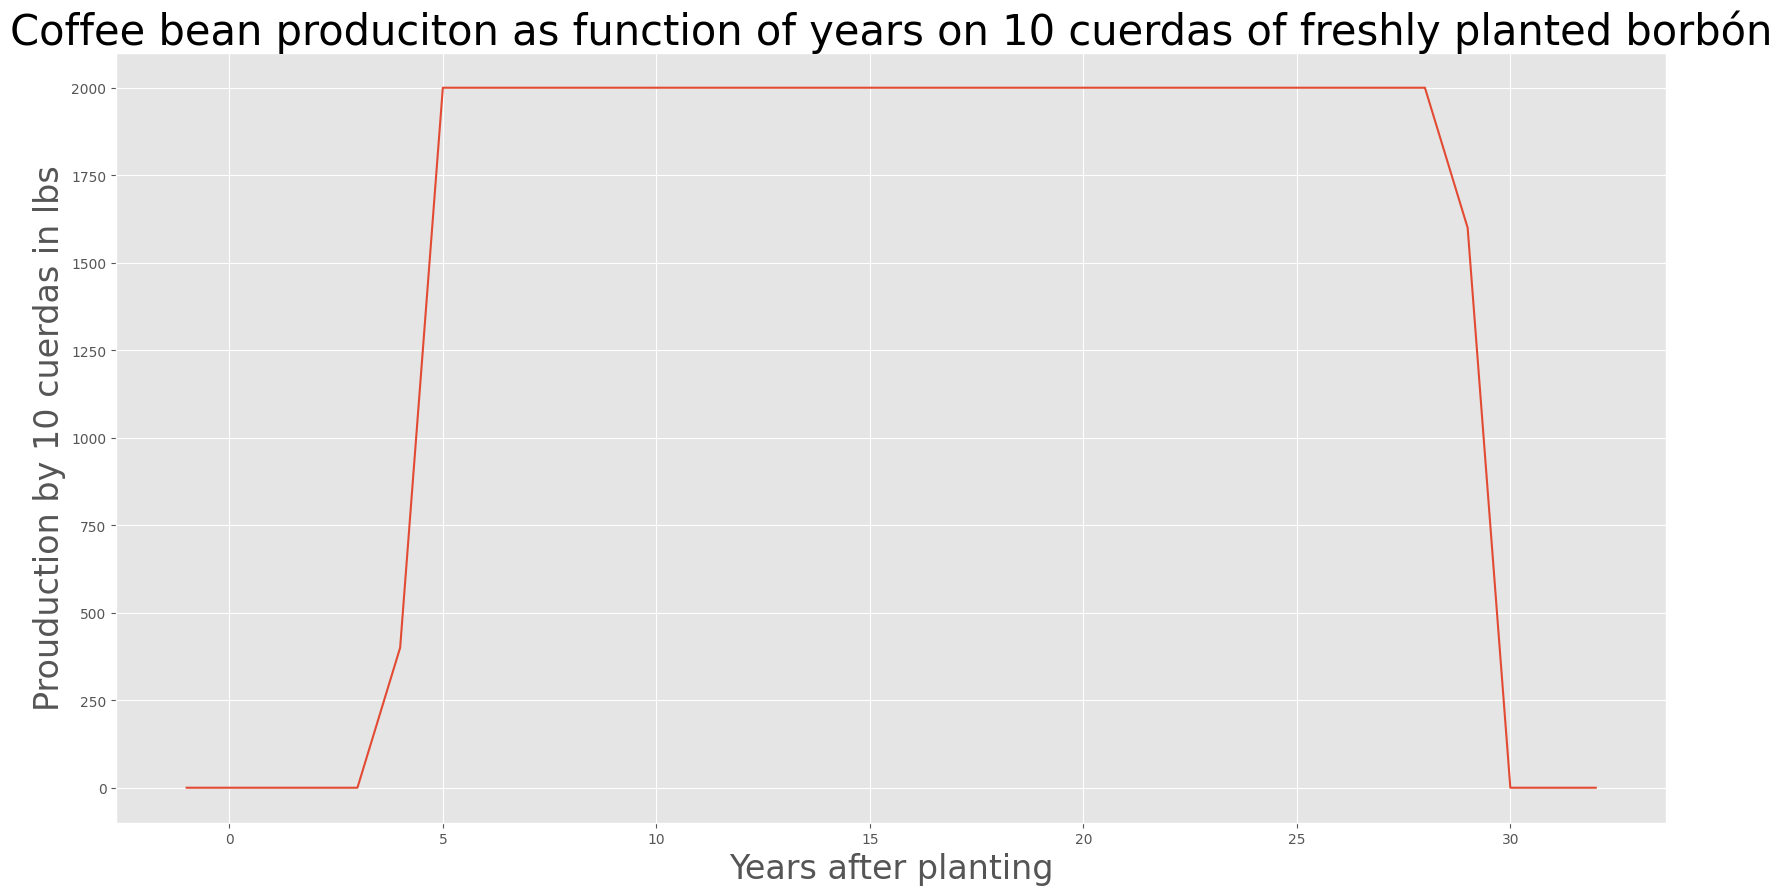

In [17]:
plt.plot(years, productionLs)
fsize = 24
plt.title("Coffee bean produciton as function of years on 10 cuerdas of freshly planted borbón", fontsize=1.25*fsize)
plt.xlabel("Years after planting", fontsize=fsize)
plt.ylabel("Prouduction by 10 cuerdas in lbs", fontsize=fsize)
plt.show()

In [8]:
def makeTreesFromLand(hectares, sowDensity, age, proportion = 1.0):
    """
    
    Parameters
    ----------
    
    hectares : int or float
        the amount of land containing the tree type of the ls the user would like to create
        
    sowDensity : int or float
        the average amount of trees per hectare
        
    age : int
        the age of the trees you would like to add to the list
        
    proportion : float
        the proportion of the land that is filled with this type of trees. 
        
        For example, if I had 5 hectares with ~ 75% borbón and 25% catuaí trees, and I wanted to calculate
        the number of borbón, I would enter `0.75` for proportion
    
    
    """
    if type(age) != int:
        age = int(round(age, 0))
        
    totalTrees = (hectares * sowDensity) * proportion
    totalTrees = int(round(totalTrees, 0))
    
    treeAges = []
    
    for i in range(totalTrees):
        treeAges.append(age)
        
    return(treeAges)
        

class TreeTemplate:
    
    # the example below represents the borbón tree
    # not sure if I'll keep it all this way, but it's a good start
    
    
    def __init__(self, lsOfAges, _sowDensity = 0): # use self to declare namespace
        """
        
        Parameters
        ----------
        
        lsOfAges : list of int
            `lsOfAges` is a list of the ages of all of the trees, where each integer element stands for one tree of that type
            
        _sowDensity : int
            `_sowDensity` refers to the density of trees per space. The standard, expected unit for this initializer is trees-per-hectare
        
        
        """
        self.ages = lsOfAges # ls of ages of the [insert tree name] trees
        self.trees = len(lsOfAges) # how many [insert tree name] there are
        self.sowDensity = _sowDensity # sow density in trees/hectare
        
        self.firstHarvest = {'year': 4, 'proportion': 0.2} # year of first harvest and proportion of harvest until full
        self.fullHarvest = {'year': 5, 'proportion': 1.0}  # year of first harvest and proportion of harvest
        self.descentHarvest = {'year': 23, 'proportionDescent': 0.2} # year that production descends and annual proportion descent
        self.pruneHarvest = {'yearShift': -5, 'proportionAscent': 0.2} # these are placeholder values to remember to add member val
        self.death = {'year': 25} # year in which trees are expelled from dataset
        
        self.treeHarvestCap = 200 # units, in this case ?? lbs i think
        self.totalHarvest = 0 # units, in this case ???
        
        
    def addTreesAuto(self, number, ages = 0):
        """
        
        Parameters
        ----------
        self : class
            required to change-by-reference members of the class
            
        number: int
            the number of trees the user will add to the set
            
        ages : int
            the age of the trees (which translates to the element in the list)
            the user will add to the set. default value is 0 because most
            trees are planted/added as seeds/saplings, however the param
            is adjustable because it might be useful if adding new land with
            existing trees.
            
        """
        for i in range(len(number)):
            self.ages.append(ages) # all trees planted begin at age 0
            
    def addTreeSet(self, ls):
        """
        
        Parameters
        ----------
        self : class
            required to change-by-reference members of the class
            
        ls : list
            a list (of int) where each element represents a 'tree,' with
            the element's value representing that specific tree's age
            
        see also:
            makeTreesFromLand
            
        """
        for i,e in enumerate(ls):
            self.ages.append(e)
            
    # this may be a subfunciton in the 'addYears' function
    def oneYear(self):
        """
        
        This function takes this entire set of trees and adjusts the member values in the class to grow/change/produce accordingly.
        The function uses preset parameters for the specific tree type to guide the flow-control.
        
        """
        for treeIndex, treeAge in enumerate(self.ages):
            if (treeAge < self.firstHarvest['year']):
                #print("Age before: ", treeAge)
                #print("Harvest before: ", self.totalHarvest)
                
                product = self.treeHarvestCap * self.firstHarvest['proportion']
                self.totalHarvest += product
                self.ages[treeIndex] += 1 # assure to reference the list and not the copy
                
                #print("Age after: ", self.ages[treeIndex])
                #print("Harvest after: ", self.totalHarvest)
                
                
            elif ((treeAge >= self.fullHarvest['year']) and (treeAge < self.descentHarvest['year'])):
                #print("Age before: ", treeAge)
                #print("Harvest before: ", self.totalHarvest)
                
                product = self.treeHarvestCap * self.fullHarvest['proportion']
                self.totalHarvest += product
                self.ages[treeIndex] += 1
                
                #print("Age after: ", self.ages[treeIndex])
                #print("Harvest after: ", self.totalHarvest)
                
            elif ((treeAge >= self.descentHarvest['year']) and (treeAge) < self.death['year']):
                #print("Age before: ", treeAge)
                #print("Harvest before: ", self.totalHarvest)
                
                yearsIntoDescent = treeAge - self.descentHarvest['year']
                proportion = self.fullHarvest['proportion'] - (yearsIntoDescent * self.descentHarvest['proportionDescent'])
                product = self.treeHarvestCap * proportion
                self.totalHarvest += product
                self.ages[treeIndex] += 1
                
                #print("Age after: ", self.ages[treeIndex])
                #print("Harvest after: ", self.totalHarvest)
                
            elif (treeAge == self.death['year']):
                #print("Tree dies now")
                #print("Harvest before: ", self.totalHarvest)
                continue
                #print("Age after: ", self.ages[treeIndex])
                #print("Harvest after: ", self.totalHarvest)
                
            else:
                print("""The number: %d, list index: %d is out of range:
                a tree can not be less than 0 years old, and a tree of this type can not be more than
                %d years of age"""%(treeAge, treeIndex, self.death['year']))
                break
                   
        self.ages[:] = [age for age in self.ages if (age >= 25)] # call-by-reference overwrite of ls removing dead trees. 
        # assure this ^ is outside of the loop & assure the list references the full index with '[:]'
                
            
    def getHarvest(self):
        """
        
        return the total harvest
        
        """
        return(self.totalHarvest)
    
    def setHarvestZero(self):
        """
        
        You must set Harvest to zero after each iteration of oneYear if you want to keep track of annual production
        as opposed to total time production
        
        """
        self.totalHarvest = 0